<a href="https://colab.research.google.com/github/zydusss/PyTorch/blob/main/PyTorch_Regression_Moores_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
data = pd.read_csv('/content/drive/MyDrive/datasets/PyTorchPractice/moore.csv',header=None).values
data[0:3]

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500]])

In [16]:
X = data[:,0].reshape(-1,1) # Make it 2D array of size NXD
Y = data[:,1].reshape(-1,1)

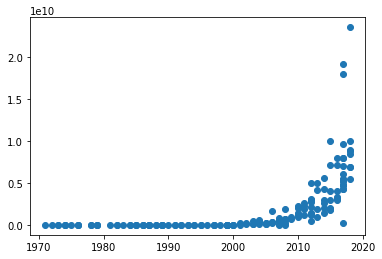

In [17]:
plt.scatter(X,Y)

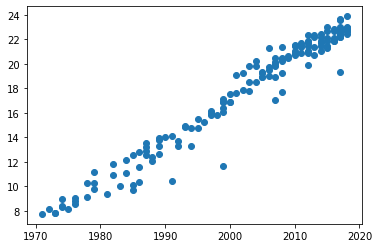

In [18]:
Y = np.log(Y)
plt.scatter(X,Y)

In [19]:
mX = X.mean()
mY = Y.mean()
sX = X.std()
sY = Y.std()

# Normalize X and Y
X = ( X - mX ) / sX
Y = ( Y - mY ) / sY

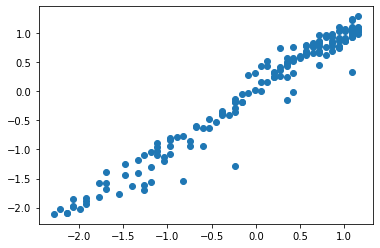

In [20]:
plt.scatter(X,Y)

In [22]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [23]:
model = nn.Linear(1,1)

In [24]:
criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(),lr=0.01, momentum=0.7)

In [27]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [28]:
type(inputs)

torch.Tensor

In [32]:
from torch.optim import optimizer
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimiser.zero_grad()
  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs,targets)
  # Record the loss
  losses.append(loss.item())
  # backward and optimise
  loss.backward()
  optimiser.step()
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 0.4514
Epoch 2/30, Loss: 0.4152
Epoch 3/30, Loss: 0.3764
Epoch 4/30, Loss: 0.3377
Epoch 5/30, Loss: 0.3006
Epoch 6/30, Loss: 0.2663
Epoch 7/30, Loss: 0.2351
Epoch 8/30, Loss: 0.2073
Epoch 9/30, Loss: 0.1828
Epoch 10/30, Loss: 0.1614
Epoch 11/30, Loss: 0.1428
Epoch 12/30, Loss: 0.1269
Epoch 13/30, Loss: 0.1132
Epoch 14/30, Loss: 0.1015
Epoch 15/30, Loss: 0.0916
Epoch 16/30, Loss: 0.0832
Epoch 17/30, Loss: 0.0761
Epoch 18/30, Loss: 0.0701
Epoch 19/30, Loss: 0.0650
Epoch 20/30, Loss: 0.0608
Epoch 21/30, Loss: 0.0572
Epoch 22/30, Loss: 0.0542
Epoch 23/30, Loss: 0.0516
Epoch 24/30, Loss: 0.0495
Epoch 25/30, Loss: 0.0477
Epoch 26/30, Loss: 0.0462
Epoch 27/30, Loss: 0.0450
Epoch 28/30, Loss: 0.0439
Epoch 29/30, Loss: 0.0430
Epoch 30/30, Loss: 0.0423


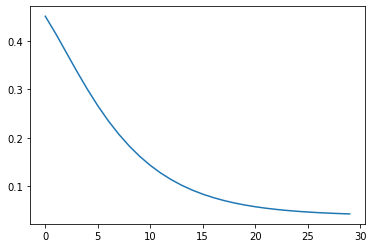

In [33]:
plt.plot(losses)

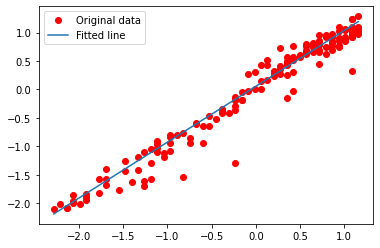

In [38]:
# Plot the model graph
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X,Y,'ro',label = 'Original data')
plt.plot(X,predicted,label='Fitted line')
plt.legend()
plt.show()